# ♠️ ♥️ Identificando naipes de cartas de baralho ♦️ ♣️

Disponível em: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification

Ou seja, um problema de classificação!

## Características do dataset

O dataset contém 7624 imagens de treino, 265 imagens de teste e 265 imagens de validação.



## Divisão do dataset

O dataset está dividido em 53 pastas, sendo uma pasta para cada tipo de carta (13 * 4 + Joker (que não tem Naipe)).

### Pastas
Como o dataset está dividido em: Cada pasta é uma classe de carta, o nome da pasta é o rótulo da classe, ou seja, dentro das pastes de test, train e valid tem pastas com os nomes "ace of hearts" (Ás de copas), "eight of spades" (Oito de espadas) etc.

### Arquivos
Os arquivos do dataset estão em .jpg (as imagens dos naipes em si) e .Identifier.


## Implementação

In [62]:
import matplotlib.pyplot as plt
def show_img(image):
    plt.figure()
    plt.imshow(image)
    plt.axis("off")

In [ ]:
import os
import cv2
from skimage.feature import hog

def load_images_and_labels(root_dir):
  X, y = [], []
  for label in os.listdir(root_dir):
    # Para cada label, vamos concatenar com o caminho inteiro do diretorio informado
    class_dir = os.path.join(root_dir, label)
    for file in os.listdir(class_dir):

      # Como nas pastas tem os arquivo .Identifier também, temos que ignorá-los.
      if file.lower().endswith((".jpg")):
        img_path = os.path.join(class_dir, file)
        img = cv2.imread(img_path)

        # Redimensionando para ficar num tamanho padrão (Lembrando que originalmente
        # as imagems estão em 224x224)
        img = cv2.resize(img, (128, 128))

        # Convertendo para a escala de cinza (porque funciona melhor com o HOG)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extraimos o HOG das imagens
        features = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), block_norm='L2-Hys') # L2-Hys == Normalização. Torna menos sensivel a brilho/contraste
        
        # Inserindo o vetor HOG no conjunto de dados
        X.append(features)

        # Armazenando o nome da classe (nome da pasta) como labels
        y.append(label)
  # Ou seja, retorna features = [[0.0, 0.12, 0.45, ..., 0.01]] / [Nome_da_classe, Nome_da_classe2]
  return X, y # O scikit-learn converte o y automaticamente com o LabelEncoder()


In [51]:
X_train, y_train = load_images_and_labels("imgs/cards/train")
X_valid, y_valid = load_images_and_labels("imgs/cards/valid")
X_test, y_test   = load_images_and_labels("imgs/cards/test")

#### Assim temos
X = lista de vetores de características

y = lista de rótulos (labels)

In [60]:
print(X_train)

[array([0.12128034, 0.        , 0.05787189, ..., 0.0018148 , 0.00143473,
       0.        ]), array([0.01539993, 0.00107198, 0.00986427, ..., 0.00330783, 0.        ,
       0.11711339]), array([0.3293539 , 0.        , 0.01033576, ..., 0.01388792, 0.01810371,
       0.04669467]), array([0.0193274 , 0.00372149, 0.38999979, ..., 0.0015097 , 0.        ,
       0.08746608]), array([0.19798288, 0.14830837, 0.25558408, ..., 0.0302493 , 0.06133088,
       0.03475356]), array([0.32531686, 0.08320424, 0.32531686, ..., 0.00112146, 0.        ,
       0.05591161]), array([0.09490269, 0.11906831, 0.11794663, ..., 0.00346728, 0.00441993,
       0.00775308]), array([0.09348299, 0.02513463, 0.0220498 , ..., 0.09429088, 0.14201191,
       0.16917336]), array([0.34156445, 0.13234176, 0.34156445, ..., 0.00559953, 0.00463565,
       0.01057355]), array([0.21141971, 0.28692955, 0.05924427, ..., 0.00822551, 0.00468714,
       0.02145066]), array([0.0256097 , 0.0662204 , 0.01535567, ..., 0.02036694, 0.0220183

In [57]:
print(y_train)

['jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds', 'jack of diamonds',

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     ace of clubs       0.50      0.80      0.62         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       0.83      1.00      0.91         5
    ace of spades       0.67      0.80      0.73         5
   eight of clubs       0.38      1.00      0.56         5
eight of diamonds       0.60      0.60      0.60         5
  eight of hearts       1.00      0.80      0.89         5
  eight of spades       0.80      0.80      0.80         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       0.75      0.60      0.67         5
   five of hearts       0.83      1.00      0.91         5
   five of spades       1.00      0.80      0.89         5
    four of clubs       0.50      0.80      0.62         5
 four of diamonds       0.71      1.00      0.83         5
   four of hearts       0.80      0.80      0.80         5
   four of spades       1.00      0.40      0.57       

Apenas mostrando visualmente que a scikit-learn (Com o LinearSVC)

In [91]:
print(y_pred)
print("\nValores únicos: %d" %len(list(set(y_pred))))

['queen of diamonds' 'jack of diamonds' 'jack of diamonds'
 'jack of diamonds' 'jack of diamonds' 'nine of clubs' 'eight of clubs'
 'nine of spades' 'nine of spades' 'eight of clubs' 'five of hearts'
 'five of hearts' 'five of hearts' 'five of hearts' 'five of hearts'
 'ace of hearts' 'ace of hearts' 'ace of hearts' 'ace of hearts'
 'ace of hearts' 'queen of spades' 'queen of diamonds' 'queen of diamonds'
 'queen of diamonds' 'queen of diamonds' 'six of spades' 'six of spades'
 'six of spades' 'six of spades' 'six of spades' 'joker' 'ace of clubs'
 'ace of clubs' 'ace of clubs' 'ace of clubs' 'ten of diamonds'
 'ten of diamonds' 'ten of diamonds' 'ten of spades' 'ten of diamonds'
 'six of hearts' 'six of hearts' 'ten of hearts' 'six of hearts'
 'six of hearts' 'eight of clubs' 'four of hearts' 'four of hearts'
 'four of hearts' 'four of hearts' 'two of clubs' 'queen of diamonds'
 'two of spades' 'ace of spades' 'two of spades' 'six of clubs'
 'ace of clubs' 'queen of hearts' 'ace of cl

## Visualizando o HOG

In [66]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2

def show_hog_visualization(image_path):
    # Carrega imagem
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extrai HOG + imagem visual
    features, hog_image = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True
    )

    # Mostra lado a lado
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Imagem original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG (visão do modelo)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


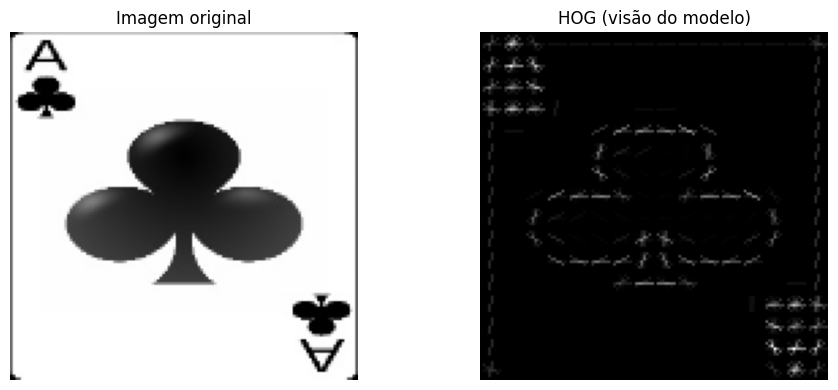

In [64]:
show_hog_visualization("imgs/cards/train/ace of clubs/003.jpg")